# Dataset overview

This notebook contains the SPARQL queries useful to have a general overview of the dataset itself (e.g. number of triples, number of subjects etc.). </br>
It is structured ad follows. Section 1 gives an overview of the numbers of objects present in the dataset. Section 2 gives an overview on cultural phenomena and the exploratory analisis of the correlation between cultural phenomena and subjects of other levels. Section 3 presents the relations between subjects of different levels. 

## Table of contents:
* [1.The dataset in numbers](#first-bullet)
* [2.Overview of Cultural Phenomena](#second-bullet)
* [3.Overview of subjects relations](#third-bullet)

In [1]:
import rdflib
from rdflib.namespace import CSVW, DC, DCAT, DCTERMS, DOAP, FOAF, ODRL2, ORG, OWL, \
                           PROF, PROV, RDF, RDFS, SDO, SH, SKOS, SOSA, SSN, TIME, \
                           VOID, XMLNS, XSD
from rdflib import Namespace
from rdflib import URIRef

import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from collections import defaultdict , Counter
import plotly.graph_objects as go
from pymantic import sparql

In [23]:
# option 1: query the graph
newg = rdflib.Graph() # we create a new graph
newg.parse("15112022output3.ttl", format="ttl")

<Graph identifier=Nda4c4ce329bb4059ab9ef97bd95bd015 (<class 'rdflib.graph.Graph'>)>

In [17]:
# option 2: query Blazegraph

# nb: to run it, you must run your local blazegraph first
server = sparql.SPARQLServer('http://127.0.0.1:9999/bigdata/sparql')

# Loading data to Blazegraph
server.update('load <file:///15112022output3.ttl>')

<Response [200]>

In [6]:
# useful functions
import json
def store_in_json(file_name, dictName): 
  with open(file_name, mode='w', encoding="utf-8") as jsonfile:
    json.dump(dictName, jsonfile)
    
# open dictionaries stored in json
def open_json(json_file): 
  with open(json_file, mode='r', encoding="utf-8") as jsonfile:
    dictName = json.load(jsonfile)
    return dictName


import csv 
def store_csv(file_name, first_line, list_of_lists): 
    with open(file_name, mode='w', newline='', encoding='UTF-8') as my_file:
        file = csv.writer(my_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_ALL)
        file.writerow(first_line) 
        for l in list_of_lists: 
            file.writerow(l) 
    return(file_name)

# open csv in a list of lists
def open_csv(file_name):
    empty_list = []
    with open(file_name) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        next(csv_reader)
        for row in csv_reader:
            empty_list.append(row)
    return empty_list

# wrap x labels in graphs
import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

# 1.The dataset in numbers<a class="anchor" id="first-bullet"></a>

In [31]:
counting_overview = []

### Number of triples

In [32]:

cq = '''
PREFIX d: <http://icondataset.org/> 
PREFIX icon: <https://w3id.org/icon/ontology/> 


SELECT (count(?subj) as ?tot) WHERE {
?subj ?rel ?obj. 

}
'''

cqres = newg.query(cq)

for row in cqres:
    print(row)
    counting_overview.append(["Triples", int(row[0])])

(rdflib.term.Literal('71318', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#integer')),)


### Number of artworks

In [34]:

cq = '''
PREFIX d: <http://icondataset.org/> 
PREFIX icon: <https://w3id.org/icon/ontology/> 
PREFIX crm: <http://www.cidoc-crm.org/cidoc-crm/>

SELECT (count(distinct ?art) as ?tot) WHERE {
#?obj a crm:E22_Human_Made_Object; 
#    crm:P65_shows_visual_item ?art. 
?art a icon:Artwork. 
?rec icon:aboutWorkOfArt ?art.  

}
'''

cqres = newg.query(cq)

for row in cqres:
    counting_overview.append(["Artworks", int(row[0])])
    print(row)

(rdflib.term.Literal('423', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#integer')),)


### Number of level 1 recognitions

In [35]:

cq = '''
PREFIX d: <http://icondataset.org/> 
PREFIX icon: <https://w3id.org/icon/ontology/> 


SELECT (count(distinct ?preic) as ?tot) WHERE {
{?preic a icon:PreiconographicalRecognition} UNION {?preic a icon:FormalMotifRecognition} 
}
'''

cqres = newg.query(cq)

for row in cqres:
    print(row)
    counting_overview.append(["Level 1 Recognitions", int(row[0])])

(rdflib.term.Literal('3517', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#integer')),)


In [ ]:
### Number of level 2 recognitions

In [36]:

cq = '''
PREFIX d: <http://icondataset.org/> 
PREFIX icon: <https://w3id.org/icon/ontology/> 


SELECT (count(distinct ?icrec) as ?tot) WHERE {
?icrec a icon:IconographicalRecognition. 
}
'''

cqres = newg.query(cq)

for row in cqres:
    counting_overview.append(["Level 2 Recognitions", int(row[0])])
    print(row)

(rdflib.term.Literal('1035', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#integer')),)


In [ ]:
### Number of level 3 recognitions

In [37]:

cq = '''
PREFIX d: <http://icondataset.org/> 
PREFIX icon: <https://w3id.org/icon/ontology/> 


SELECT (count(distinct ?rec) as ?tot) WHERE {
?rec a icon:IconologicalRecognition. 
}
'''

cqres = newg.query(cq)

for row in cqres:
    print(row)
    counting_overview.append(["Level 3 Recognitions", int(row[0])])

(rdflib.term.Literal('877', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#integer')),)


### Number of level 1 subjects

In [63]:

cq = '''
PREFIX d: <http://icondataset.org/> 
PREFIX icon: <https://w3id.org/icon/ontology/> 


SELECT (count(distinct ?lev1) as ?tot) WHERE {
?rec a icon:PreiconographicalRecognition. 
{?rec icon:recognizedArtisticMotif ?am} UNION {?rec icon:recognizedComposition ?comp. ?comp icon:hasPart ?am}
?am icon:hasFactualMeaning | icon:hasExpressionalMeaning | crm:P138_represents ?lev1. 
}
'''

cqres = newg.query(cq)

for row in cqres:
    print(row)
    counting_overview.append(["Level 1 subjects", int(row[0])])

(rdflib.term.Literal('923', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#integer')),)


### Number of level 2 subjects

In [39]:

cq = '''
PREFIX d: <http://icondataset.org/> 
PREFIX icon: <https://w3id.org/icon/ontology/>


SELECT (count(distinct ?lev2) as ?tot) WHERE {
VALUES ?rel {icon:hasCharacter icon:hasEvent icon:hasPlace icon:hasPersonification icon:hasNamedObject icon:hasSymbol}
?rec a icon:IconographicalRecognition. 
{?rec icon:recognizedImage ?img. ?img ?rel ?lev2} UNION {?rec icon:recognizedInvenzione ?inv. ?inv icon:composedOf ?lev2}

}
'''

cqres = newg.query(cq)

for row in cqres:
    print(row)
    counting_overview.append(["Level 2 subjects", int(row[0])])
counting_overview

(rdflib.term.Literal('555', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#integer')),)


[['Triples', 71318],
 ['Artworks', 423],
 ['Level 1 Recognitions', 3517],
 ['Level 2 Recognitions', 1035],
 ['Level 3 Recognitions', 877],
 ['Level 1 subjects', 888],
 ['Level 2 subjects', 555]]

### Number of level 3 subjects

In [40]:

cq = '''
PREFIX d: <http://icondataset.org/> 
PREFIX icon: <https://w3id.org/icon/ontology/>


SELECT (count(distinct ?lev3) as ?tot) WHERE {
VALUES ?rel {icon:recognizedConceptualObject icon:recognizedCulturalPhenomenon}
?rec a icon:IconologicalRecognition. 
?rec icon:recognizedIntrinsicMeaning ?intrinsic. ?intrinsic ?rel ?lev3. 
}
'''

cqres = newg.query(cq)

for row in cqres:
    print(row)
    counting_overview.append(["Level 3 subjects", int(row[0])])

(rdflib.term.Literal('422', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#integer')),)


### Number of people

In [41]:
cq = '''
PREFIX d: <http://icondataset.org/> 
PREFIX icon: <https://w3id.org/icon/ontology/>
PREFIX crm: <http://www.cidoc-crm.org/cidoc-crm/>

SELECT (count(distinct ?people) as ?tot) WHERE {

?people a crm:E21_Person. 

}
'''

cqres = newg.query(cq)

for row in cqres:
    print(row)
    counting_overview.append(["People", int(row[0])])

(rdflib.term.Literal('214', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#integer')),)


In [11]:
if (URIRef("http://icondataset.org/people/cesare-vecellio"), None, None) in newg:
    print("this works")
else: 
    print("not working")

not working


### Number of books

In [42]:
cq = '''
PREFIX d: <http://icondataset.org/> 
PREFIX icon: <https://w3id.org/icon/ontology/>
PREFIX crm: <http://www.cidoc-crm.org/cidoc-crm/>

SELECT (count(distinct ?book) as ?tot) WHERE {

{?book crm:P2_has_type ?type. 
?type crm:P2_has_type <http://vocab.getty.edu/page/aat/300028051>. } 
UNION 
{?book crm:P2_has_type <http://vocab.getty.edu/page/aat/300028051>}

}
'''

cqres = newg.query(cq)

for row in cqres:
    print(row)
    counting_overview.append(["Books", int(row[0])])

(rdflib.term.Literal('147', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#integer')),)


### Number of Places

In [43]:
cq = '''
PREFIX d: <http://icondataset.org/> 
PREFIX icon: <https://w3id.org/icon/ontology/>
PREFIX crm: <http://www.cidoc-crm.org/cidoc-crm/>

SELECT (count(distinct ?place) as ?tot) WHERE {
#?art crm:P53_has_former_or_current_location ?place.
# ?place crm:P89_falls_within ?place2. 
?place a crm:E53_Place.

}
'''

cqres = newg.query(cq)

for row in cqres:
    print(row)
    counting_overview.append(["Places", int(row[0])])

(rdflib.term.Literal('221', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#integer')),)


### number of artworks types

In [44]:
cq = '''
PREFIX d: <http://icondataset.org/> 
PREFIX icon: <https://w3id.org/icon/ontology/>
PREFIX crm: <http://www.cidoc-crm.org/cidoc-crm/>

SELECT (count(distinct ?type) as ?tot) WHERE {
?obj crm:P65_shows_visual_item ?art; 
    crm:P2_has_type ?type. 


}
'''

cqres = newg.query(cq)

for row in cqres:
    print(row)
    counting_overview.append(["Cultural Object types", int(row[0])])

(rdflib.term.Literal('56', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#integer')),)


### Number of styles

In [45]:
cq = '''
PREFIX d: <http://icondataset.org/> 
PREFIX icon: <https://w3id.org/icon/ontology/>
PREFIX crm: <http://www.cidoc-crm.org/cidoc-crm/>

SELECT (count(distinct ?style) as ?tot) WHERE {

?style crm:P2_has_type <http://vocab.getty.edu/aat/300015646>.



}
'''

cqres = newg.query(cq)

for row in cqres:
    print(row)
    counting_overview.append(["Styles", int(row[0])])

(rdflib.term.Literal('32', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#integer')),)


### Number of periods

In [46]:
cq = '''
PREFIX d: <http://icondataset.org/> 
PREFIX icon: <https://w3id.org/icon/ontology/>
PREFIX crm: <http://www.cidoc-crm.org/cidoc-crm/>

SELECT (count(distinct ?period) as ?tot) WHERE {

?period a crm:E4_Period.



}
'''

cqres = newg.query(cq)

for row in cqres:
    print(row)
    counting_overview.append(["Periods", int(row[0])])

(rdflib.term.Literal('12', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#integer')),)


### Number of sources cited as evidence

In [47]:
cq = '''
PREFIX d: <http://icondataset.org/> 
PREFIX icon: <https://w3id.org/icon/ontology/>
PREFIX crm: <http://www.cidoc-crm.org/cidoc-crm/>
PREFIX cito: <http://purl.org/spar/cito/>

SELECT (count(distinct ?evidence) as ?tot) WHERE {

?entity cito:citesAsEvidence ?evidence. 



}
'''

cqres = newg.query(cq)

for row in cqres:
    print(row)
    counting_overview.append(["cited Evidences", int(row[0])])

(rdflib.term.Literal('186', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#integer')),)


### Number of resources aligned

In [48]:
cq = '''
PREFIX d: <http://icondataset.org/> 
PREFIX icon: <https://w3id.org/icon/ontology/>
PREFIX crm: <http://www.cidoc-crm.org/cidoc-crm/>
PREFIX owl: <http://www.w3.org/2002/07/owl#> 


SELECT (count(distinct ?entity) as ?tot) WHERE {

?entity owl:sameAs ?evidence. 



}
'''

cqres = newg.query(cq)

for row in cqres:
    print(row)
    counting_overview.append(["resources aligned", int(row[0])])

(rdflib.term.Literal('195', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#integer')),)


In [64]:
# we don't consider triples, as the visualization is not interesting with a such high number 
counting_overview.remove(["Level 1 subjects", 888])
counting_overview

[['Artworks', 423],
 ['Level 1 Recognitions', 3517],
 ['Level 2 Recognitions', 1035],
 ['Level 3 Recognitions', 877],
 ['Level 2 subjects', 555],
 ['Level 3 subjects', 422],
 ['People', 214],
 ['Books', 147],
 ['Places', 221],
 ['Cultural Object types', 56],
 ['Styles', 32],
 ['Periods', 12],
 ['cited Evidences', 186],
 ['resources aligned', 195],
 ['Level 1 subjects', 923]]

In [65]:
# barchart of the countings, excluding the number of triples ? 

# List of lists where each list is [object, frequency] 

df = pd.DataFrame(np.array(counting_overview),
                   columns=['Object', 'Frequency'])
df['Frequency'] = df['Frequency'].astype(int)
result = df.dtypes

print("Output:")
print(result)


Output:
Object       object
Frequency     int32
dtype: object


In [66]:
dfcount = df.sort_values(by=['Frequency'], ascending=False)
dfcount

,Object,Frequency
1,Level 1 Recognitions,3517
2,Level 2 Recognitions,1035
14,Level 1 subjects,923
3,Level 3 Recognitions,877
4,Level 2 subjects,555
0,Artworks,423
5,Level 3 subjects,422
8,Places,221
6,People,214
13,resources aligned,195


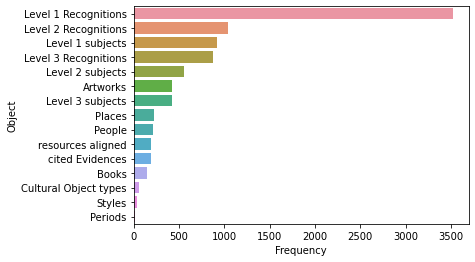

In [67]:
import seaborn as seaborn 
chartCount = seaborn.barplot(data=dfcount, x = 'Frequency', y='Object')

# 2. Overwiew of Cultural Phenomena<a class="anchor" id="second-bullet"></a>

section with: 
* [2-1 Overview of the major categories counting](#2.1-Overview-of-the-major-categories-counting)
* 2.2 [Barcharts showing the frequency of the top subjects per cultural phenomenon](#2.2-Frequency-of-the-top-K-subjects-per-Cultural-Phenomenon-(barcharts))
* [2.3 General histogram of frequency of subjects per Cultural Phenomenon](#2.3-Frequency-of-the-top-K-subjects-per-Cultural-Phenomenon-(overall-visualization))
* [2.4 Co-occurrencies of subjects and Cultural Phenomena](#2.4-Co-occurrencies-of-subjects-and-Cultural-Phenomena)

<br>

[Back to top](#Dataset-overview)

## 2.1 Distribution of cultural phenomena
count how many artworks have a certain phenomenon category and visualize it. NB: one cultural phenomenon may have more than one category

In [69]:
cf_category_frequency = []
cq1 = '''
prefix data: <http://icondataset.org/> 
PREFIX icon: <https://w3id.org/icon/ontology/> 
prefix sim: <https://w3id.org/simulation/ontology/>
prefix dul: <http://www.ontologydesignpatterns.org/ont/dul/DUL.owl#>
prefix crm: <http://www.cidoc-crm.org/cidoc-crm/>

SELECT DISTINCT ?CFBroaderLabel (count(distinct ?artwork) as ?tot) WHERE {
  ?iconol icon:aboutWorkOfArt ?artwork;
  icon:recognizedIntrinsicMeaning ?intrinsic.
  ?intrinsic icon:recognizedCulturalPhenomenon ?meaning.
  ?meaning a icon:CulturalPhenomenon; crm:P2_has_type ?CFBroader. 
  ?CFBroader rdfs:label ?CFBroaderLabel .
}
GROUP BY ?CFBroaderLabel 
ORDER BY DESC(?tot)
'''

cq1res = newg.query(cq1)
for row in cq1res: 
    if str(row[0]) != "?": 
        cf_category_frequency.append([str(row[0]), int(row[1])])
    

In [70]:
df2 = pd.DataFrame(np.array(cf_category_frequency),
                   columns=['Cultural Phenomenon', 'Frequency'])
df2['Frequency'] = df2['Frequency'].astype(int)
result = df2.dtypes

print("Output:")
print(result)


Output:
Cultural Phenomenon    object
Frequency               int32
dtype: object


In [71]:
# df3 = df2.sort_values(by=['Frequency'], ascending=False)
df3 = df2.sort_index(ascending=False)
df3

,Cultural Phenomenon,Frequency
20,Cultural interpretation,2
19,Moral meaning,2
18,Iconographic interpretation,3
17,Taste,3
16,Humour,3
15,Cultural movement,4
14,Cultural value,7
13,Societal phenomenon,10
12,Cultural influence,14
11,Attitude,15


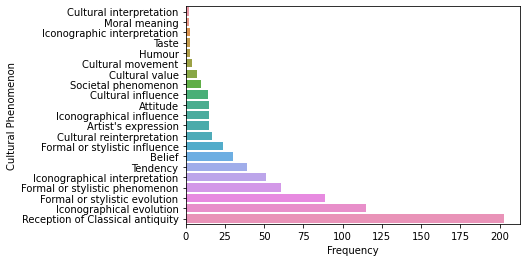

In [72]:
import seaborn as seaborn 
chart = seaborn.barplot(data=df3, x = 'Frequency', y='Cultural Phenomenon')

[Back to top](#Dataset-overview) <br>
[Back to section 2](#2.-Overwiew-of-Cultural-Phenomena)

## 2.2 Frequency of the top K subjects per Cultural Phenomenon (barcharts)

### Top 5 level 2 subjects per cultural phenomenon category

In [78]:

cq2 = """
prefix d: <http://icondataset.org/> 
PREFIX icon: <https://w3id.org/icon/ontology/> 
prefix sim: <https://w3id.org/simulation/ontology/>
prefix dul: <http://www.ontologydesignpatterns.org/ont/dul/DUL.owl#>
prefix crm: <http://www.cidoc-crm.org/cidoc-crm/>

SELECT DISTINCT ?CFbroader ?CFbroaderLabel ?artwork ?subj2  WHERE {
  VALUES ?rel {icon:hasCharacter icon:hasEvent icon:hasNamedObject icon:hasPlace icon:hasPersonification icon:hasSymbol}
  ?CFbroader ^crm:P2_has_type ?meaning.
  ?meaning ^icon:recognizedCulturalPhenomenon / ^icon:recognizedIntrinsicMeaning ?iconol .
  ?iconol icon:aboutWorkOfArt ?artwork .
  ?icrec icon:aboutWorkOfArt ?artwork; 
          a icon:IconographicalRecognition;
          icon:recognizedImage ?image.
 
  ?CFbroader rdfs:label ?CFbroaderLabel. 
  ?image ?rel ?subj2. 

  #OPTIONAL {
  #  ?icrec icon:aboutWorkOfArt ?artwork;
  #  a icon:IconographicalRecognition; icon:recognizedInvenzione ?subj2.
  #}

} 
""" 

cq2res = newg.query(cq2)
#for row in cq2res:
 # print(row[0], '-',row[3], " -- cf: ", row[1])

In [79]:
from collections import defaultdict , Counter

meanings_subjects = defaultdict(list)
# ?meaning ?artwork ?subj2
for row in cq2res:
  meanings_subjects[str(row['CFbroader'])].append(str(row['subj2']))


meanings_subjects_with_counts = {}
for k,v in meanings_subjects.items():
#  for m,c in well_represented_phenomena_and_counts:
 #   if k == m:
    meanings_subjects_with_counts[k] = dict(Counter(v).most_common())

# add count

#meanings_subjects_with_counts

In [80]:
# tpo 5 most frequent subjects per cf
# maybe repeat the analysis with subject 2 broader categories? 
top_5_subj_per_cf = {}
for item in meanings_subjects_with_counts.items():
    if item[0] not in top_5_subj_per_cf:
        top_5_subj_per_cf[item[0]] = {}
        for pair in item[1].items(): 
            if len(top_5_subj_per_cf[item[0]]) < 5:
                top_5_subj_per_cf[item[0]][pair[0]] = pair[1]
               
#top_5_subj_per_cf   

In [81]:
# labels 
labels = {}

candidate = []
for key, value in top_5_subj_per_cf.items(): 
    candidate.append("<"+key+">")
    for subj in value: 
        if subj not in candidate: 
            candidate.append("<"+subj+">") 
            
labels = {}
# no modify
cqLabel = """
prefix d: <http://icondataset.org/> 
PREFIX icon: <https://w3id.org/icon/ontology/> 
prefix sim: <https://w3id.org/simulation/ontology/>
prefix dul: <http://www.ontologydesignpatterns.org/ont/dul/DUL.owl#>
prefix crm: <http://www.cidoc-crm.org/cidoc-crm/>

SELECT DISTINCT ?item ?label  WHERE {
    VALUES ?item { """+ ' '.join(candidate) +"""}
    ?item rdfs:label ?label. 

} 
""" 

cqLabelres = newg.query(cqLabel)

for row in cqLabelres:
 # print(row[0], row[1])
  if str(row[0]) not in labels: 
    labels[str(row[0])] = str(row[1])
print(labels)   


{'http://icondataset.org/reception-of-classical-antiquity': 'Reception of Classical antiquity', 'http://icondataset.org/saturn': 'Saturn', 'http://icondataset.org/cupid': 'Cupid', 'http://icondataset.org/mercury': 'Mercury', 'http://icondataset.org/venus': 'Venus', 'http://icondataset.org/jupiter': 'Jupiter', 'http://icondataset.org/iconographical-evolution': 'Iconographical evolution', 'http://icondataset.org/companion-of-serapis': 'Companion of Serapis', 'http://icondataset.org/apollo': 'Apollo', 'http://icondataset.org/societal-phenomenon': 'Societal phenomenon', 'http://icondataset.org/people/lorenzo-de-medici': "Lorenzo de' Medici", 'http://icondataset.org/the-young-mago-caspar': 'The young Mago Caspar', 'http://icondataset.org/member-of-the-procession': 'Member of the procession', 'http://icondataset.org/tendency': 'Tendency', 'http://icondataset.org/era-sub-vulcano': 'Era Sub Vulcano', 'http://icondataset.org/mary': 'Mary', 'http://icondataset.org/satyr': 'Satyr', 'http://iconda

In [82]:
# extract list of lists for each cf with the corresponding labels
subj2_counting_cf = []

for key, value in top_5_subj_per_cf.items(): 
    cf = labels[key] 
    for v in value.items():
        subj2 = labels[v[0]]
        freq = v[1]
        subj2_counting_cf.append([cf, subj2, freq])

#subj2_counting_cf    

In [83]:
line = ["Cultural Phenomenon", "Level 2 subject", "Frequency"] # labels only
save = store_csv("subj2_per_cf_top_5.csv", line, subj2_counting_cf)

In [84]:
dfSubjCf = pd.DataFrame(np.array(subj2_counting_cf),
                   columns=['Cultural Phenomenon', 'Level 2 Subject', 'Frequency'])
dfSubjCf['Frequency'] = dfSubjCf['Frequency'].astype(int)

In [85]:
dfSubjCf

,Cultural Phenomenon,Level 2 Subject,Frequency
0,Reception of Classical antiquity,Saturn,16
1,Reception of Classical antiquity,Cupid,14
2,Reception of Classical antiquity,Mercury,11
3,Reception of Classical antiquity,Venus,8
4,Reception of Classical antiquity,Jupiter,8
...,...,...,...
89,Cultural value,Olympian Gods,1
90,Cultural value,Zeus,1
91,Cultural value,Mercury (Hermes),1
92,Iconographic interpretation,Companion of Serapis,3


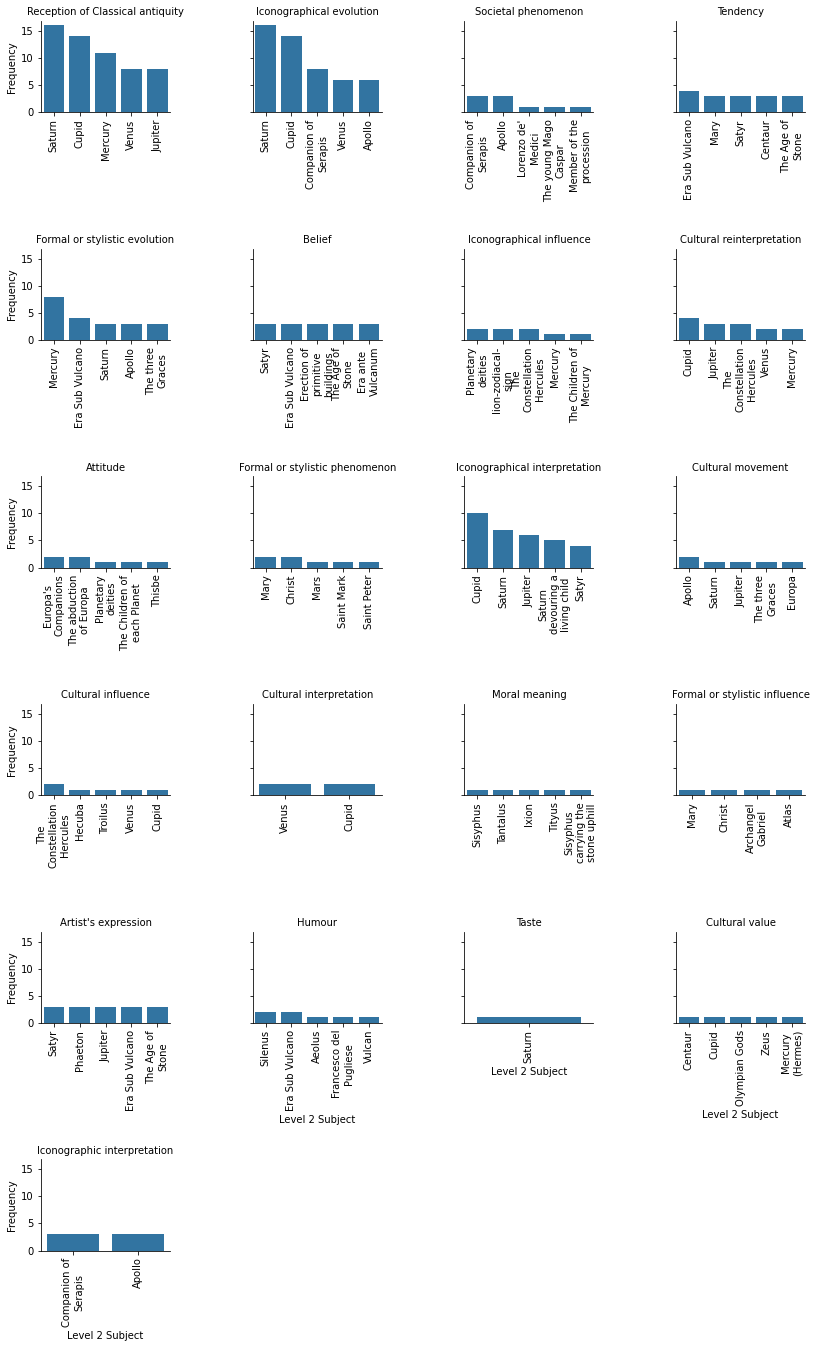

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
# https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

gr = sns.FacetGrid(dfSubjCf, col="Cultural Phenomenon", col_wrap=4, sharex=False)
gr.map_dataframe(sns.barplot, x="Level 2 Subject", y="Frequency")
gr.set_titles(col_template="{col_name}")
#plt.tight_layout()

for axes in gr.axes.flat: # we modify the x labels
    wrap_labels(axes, 15) # wrap the labels longer than 15 characters
    axes.set_xticklabels(axes.get_xticklabels(), rotation=90) # rotate the labels

# gr.fig.tight_layout()
plt.subplots_adjust(hspace=1.5) # height space between graphs

### Top 5 level 1 subjects per cultural phenomenon category

In [ ]:
# too long
cq2 = """
prefix d: <http://icondataset.org/> 
PREFIX icon: <https://w3id.org/icon/ontology/> 
prefix sim: <https://w3id.org/simulation/ontology/>
prefix dul: <http://www.ontologydesignpatterns.org/ont/dul/DUL.owl#>
prefix crm: <http://www.cidoc-crm.org/cidoc-crm/>

SELECT DISTINCT ?CFbroader ?artwork ?subj1  WHERE {
  VALUES ?rel1 {icon:hasFactualMeaning icon:hasExpressionalMeaning crm:P138_represents}
  ?CFbroader ^crm:P2_has_type ?meaning.
  ?meaning ^icon:recognizedCulturalPhenomenon / ^icon:recognizedIntrinsicMeaning ?iconol .
  ?iconol icon:aboutWorkOfArt ?artwork .
  ?preicrec icon:aboutWorkOfArt ?artwork; 
          a icon:PreiconographicalRecognition;
          icon:recognizedArtisticMotif | icon:recognizedComposition ?lev1.
  {?lev1 icon:hasPart ?am. ?am ?rel1 ?subj1} UNION {?lev1 ?rel1 ?subj1}
   ?subj1 a ?type1.
 

  #OPTIONAL {
  #  ?icrec icon:aboutWorkOfArt ?artwork;
  #  a icon:IconographicalRecognition; icon:recognizedInvenzione ?subj2.
  #}

} 
""" 

cq2res = newg.query(cq2)
for row in cq2res:
  print(row[0], '-',row[2])

In [23]:
# same query on blazegraph
art_cf_subj1 = []
result = server.query("""
prefix d: <http://icondataset.org/> 
PREFIX icon: <https://w3id.org/icon/ontology/> 
prefix sim: <https://w3id.org/simulation/ontology/>
prefix dul: <http://www.ontologydesignpatterns.org/ont/dul/DUL.owl#>
prefix crm: <http://www.cidoc-crm.org/cidoc-crm/>

SELECT DISTINCT ?CFbroader ?artwork ?subj1  WHERE {
  VALUES ?rel1 {icon:hasFactualMeaning icon:hasExpressionalMeaning crm:P138_represents}
  ?CFbroader ^crm:P2_has_type ?meaning.
  ?meaning ^icon:recognizedCulturalPhenomenon / ^icon:recognizedIntrinsicMeaning ?iconol .
  ?iconol icon:aboutWorkOfArt ?artwork .
  ?preicrec icon:aboutWorkOfArt ?artwork; 
          a icon:PreiconographicalRecognition;
          icon:recognizedArtisticMotif | icon:recognizedComposition ?lev1.
  {?lev1 icon:hasPart ?am. ?am ?rel1 ?subj1} UNION {?lev1 ?rel1 ?subj1}
  # ?subj1 a ?type1.
 


} 
""")
for b in result['results']['bindings']:
    art_cf_subj1.append([b["CFbroader"]["value"], b["artwork"]["value"], b["subj1"]["value"]])


In [141]:
from collections import defaultdict , Counter

meanings_subjects = defaultdict(list)
# ?meaning ?artwork ?subj2
for l in art_cf_subj1:
  meanings_subjects[str(l[0])].append(str(l[2]))


cf_subjects_with_counts = {}
for k,v in meanings_subjects.items():
#  for m,c in well_represented_phenomena_and_counts:
 #   if k == m:
    cf_subjects_with_counts[k] = dict(Counter(v).most_common())

# add count

#meanings_subjects_with_counts

In [142]:
# tpo 5 most frequent subjects per cf
# maybe repeat the analysis with subject 2 broader categories? 
top_5_subj_per_cf = {}
for item in cf_subjects_with_counts.items():
    if item[0] not in top_5_subj_per_cf:
        top_5_subj_per_cf[item[0]] = {}
        for pair in item[1].items(): 
            if len(top_5_subj_per_cf[item[0]]) < 5:
                top_5_subj_per_cf[item[0]][pair[0]] = pair[1]
               
#top_5_subj_per_cf   

In [ ]:
# labels 
labels = {}

candidate = []
for key, value in top_5_subj_per_cf.items(): 
    candidate.append("<"+key+">")
    for subj in value: 
        if subj not in candidate: 
            candidate.append("<"+subj+">") 
            
labels = {}
# no modify
cqLabel = """
prefix d: <http://icondataset.org/> 
PREFIX icon: <https://w3id.org/icon/ontology/> 
prefix sim: <https://w3id.org/simulation/ontology/>
prefix dul: <http://www.ontologydesignpatterns.org/ont/dul/DUL.owl#>
prefix crm: <http://www.cidoc-crm.org/cidoc-crm/>

SELECT DISTINCT ?item ?label  WHERE {
    VALUES ?item { """+ ' '.join(candidate) +"""}
    ?item rdfs:label ?label. 

} 
""" 

cqLabelres = newg.query(cqLabel)

for row in cqLabelres:
 # print(row[0], row[1])
  if str(row[0]) not in labels: 
    labels[str(row[0])] = str(row[1])
print(labels)   


In [148]:
# extract list of lists for each cf with the corresponding labels
subj1_counting_cf = []

for key, value in top_5_subj_per_cf.items(): 
    cf = labels[key] 
    for v in value.items():
        subj1 = labels[v[0]]
        freq = v[1]
        subj1_counting_cf.append([cf, subj1, freq])

#subj2_counting_cf    

In [150]:
line = ["Cultural Phenomenon", "Level 1 subject", "Frequency"] # labels only
save = store_csv("subj1_per_cf_top_5.csv", line, subj1_counting_cf)

In [151]:
dfSubjCf = pd.DataFrame(np.array(subj1_counting_cf),
                   columns=['Cultural Phenomenon', 'Level 1 Subject', 'Frequency'])
dfSubjCf['Frequency'] = dfSubjCf['Frequency'].astype(int)

In [152]:
dfSubjCf

,Cultural Phenomenon,Level 1 Subject,Frequency
0,Cultural reinterpretation,man,7
1,Cultural reinterpretation,grabbing with one hand,6
2,Cultural reinterpretation,constellation,4
3,Cultural reinterpretation,clothes,3
4,Cultural reinterpretation,woman,3
...,...,...,...
100,Cultural interpretation,woman,2
101,Cultural interpretation,bandage,2
102,Cultural interpretation,wings,2
103,Cultural interpretation,court dress,2


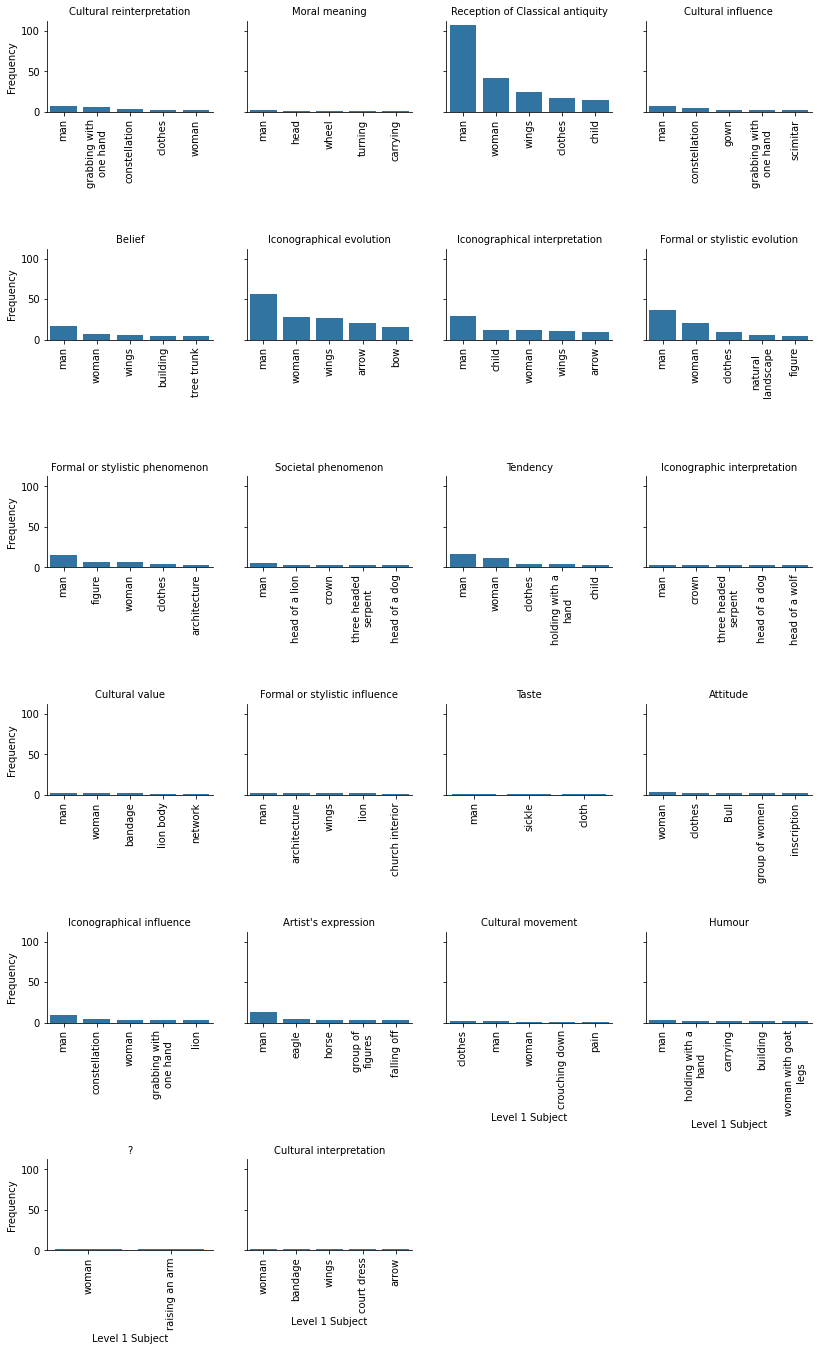

In [153]:
import seaborn as sns
import matplotlib.pyplot as plt
# https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

gr = sns.FacetGrid(dfSubjCf, col="Cultural Phenomenon", col_wrap=4, sharex=False)
gr.map_dataframe(sns.barplot, x="Level 1 Subject", y="Frequency")
gr.set_titles(col_template="{col_name}")
#plt.tight_layout()

for axes in gr.axes.flat: # we modify the x labels
    wrap_labels(axes, 15) # wrap the labels longer than 15 characters
    axes.set_xticklabels(axes.get_xticklabels(), rotation=90) # rotate the labels

# gr.fig.tight_layout()
plt.subplots_adjust(hspace=1.5) # height space between graphs

[Back to top](#Dataset-overview) <br>
[Back to section 2](#2.-Overwiew-of-Cultural-Phenomena)

## 2.3 Frequency of the top K subjects per Cultural Phenomenon (overall visualization)


In [25]:
dfSubjCf = pd.read_csv("subj2_per_cf_top_5.csv")
dfSubjCf['Frequency'] = dfSubjCf['Frequency'].astype(int)

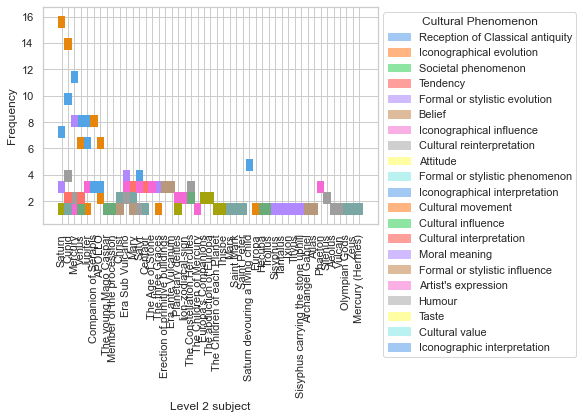

In [36]:
import seaborn as sns
sns.set_theme(style="whitegrid")


# Draw a nested barplot. Color represents each cultural phenomenon
g= sns.histplot(data=dfSubjCf, x="Level 2 subject", y="Frequency", hue="Cultural Phenomenon", palette="pastel")
# g = sns.histplot(data=df6, x="Subject", y="Frequency", hue="Cultural Phenomenon", palette="pastel")
# g.despine(left=True)
# g.set_axis_labels("", "Frequency")
# g.legend.set_title("")
plt.xticks(rotation=90)
#plt.tight_layout()
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))

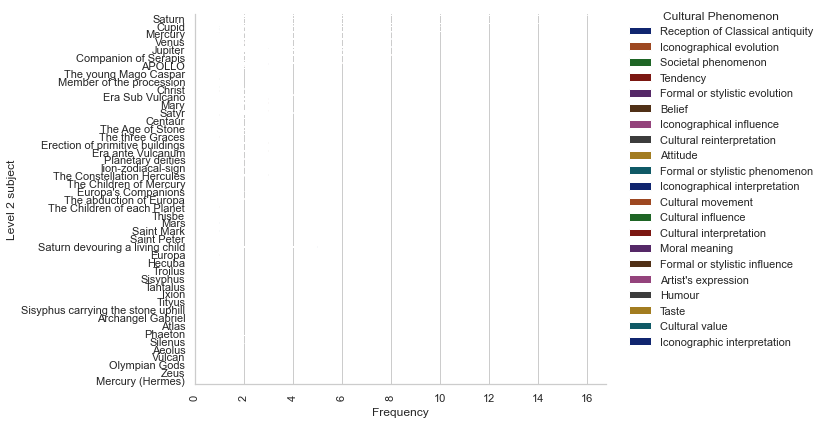

In [30]:
import seaborn as sns
sns.set_theme(style="whitegrid")


# Draw a nested barplot. Color represents each cultural phenomenon
g= sns.catplot(data=dfSubjCf,kind="bar", x="Frequency", y="Level 2 subject", hue="Cultural Phenomenon", palette="dark", height=6)
# g = sns.histplot(data=df6, x="Subject", y="Frequency", hue="Cultural Phenomenon", palette="pastel")
# g.despine(left=True)
# g.set_axis_labels("", "Frequency")
# g.legend.set_title("")
plt.xticks(rotation=90)
plt.tight_layout()
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))

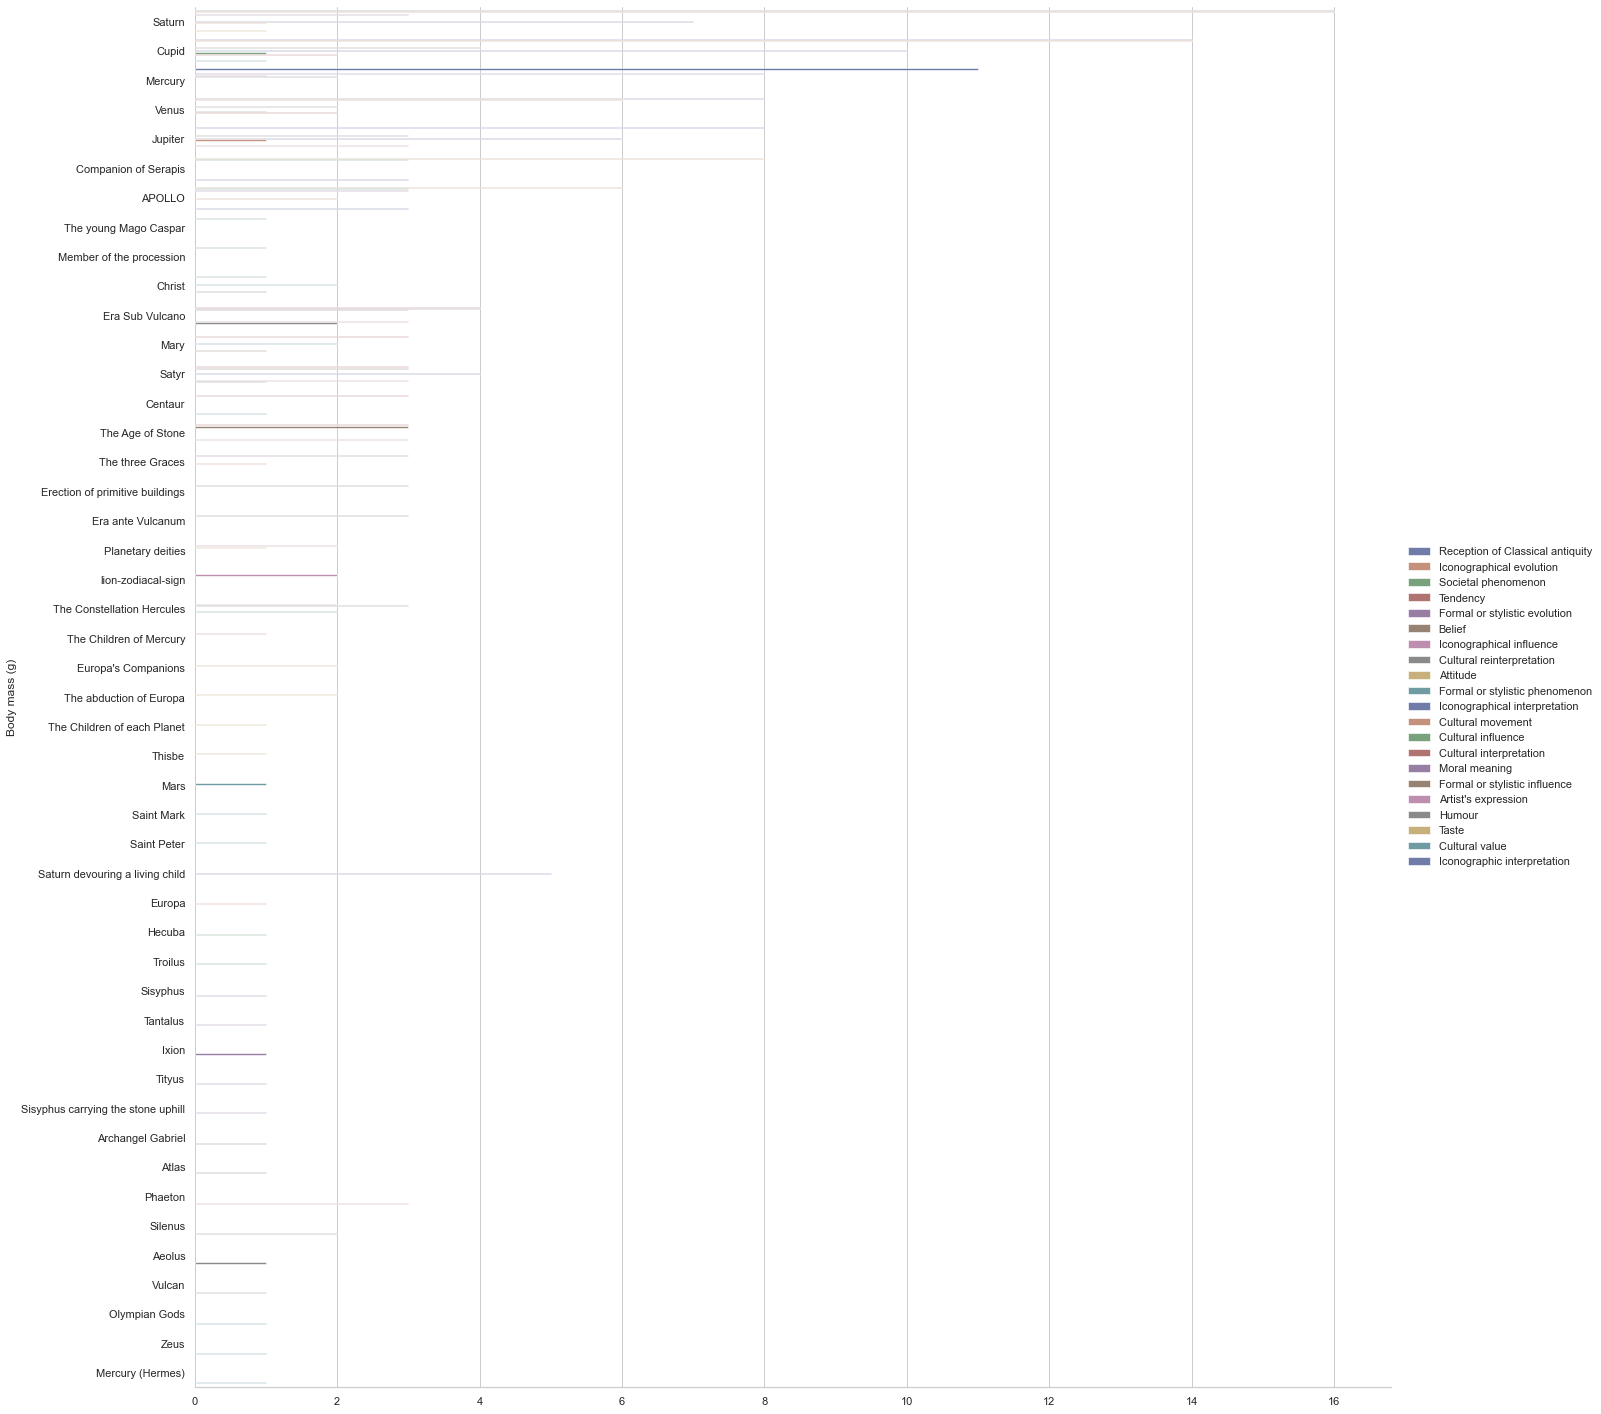

In [34]:
import seaborn as sns
sns.set_theme(style="whitegrid")


# Draw a nested barplot by species and sex
g = sns.catplot(
    data=dfSubjCf, kind="bar", x="Frequency", y="Level 2 subject", hue="Cultural Phenomenon",
     palette="dark", alpha=.6, height=20
)
g.despine(left=True)
g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("")

In [ ]:
#dfMeanings = meanings_subjects
meanings_subjects_without_count = []
for cf, value in meanings_subjects.items(): 
    name = cf[0]
    for s in value: 
       meanings_subjects_without_count.append([cf, s]) 
meanings_subjects_without_count

[Back to top](#Dataset-overview) <br>
[Back to section 2](#2.-Overwiew-of-Cultural-Phenomena)

## 2.4 Co-occurrencies of subjects and Cultural Phenomena

In [ ]:
# lev 3
artwork_lev3 = []

cq10 = """
prefix d: <http://icondataset.org/> 
PREFIX icon: <https://w3id.org/icon/ontology/> 
prefix sim: <https://w3id.org/simulation/ontology/>
prefix dul: <http://www.ontologydesignpatterns.org/ont/dul/DUL.owl#>
prefix crm: <http://www.cidoc-crm.org/cidoc-crm/>

SELECT DISTINCT ?artwork ?meaning ?CFBroader  WHERE {
 # VALUES ?rel {icon:hasCharacter icon:hasEvent icon:hasNamedObject icon:hasPlace icon:hasPersonification icon:hasSymbol}

  ?meaning ^icon:recognizedCulturalPhenomenon / ^icon:recognizedIntrinsicMeaning ?iconol .
  ?meaning crm:P2_has_type ?CFBroader.
  ?iconol icon:aboutWorkOfArt ?artwork .


} 
""" 

cq10res = newg.query(cq10)
for row in cq10res:
    artwork_lev3.append([str(row[0]), str(row[1]), str(row[2])])
    print(row)

In [9]:
first_line = ["Artwork", "CulturalPhenomenon", "Type"]
store = store_csv("art_cf_lev3.csv", first_line, artwork_lev3)

In [8]:
artwork_lev3 = open_csv("art_cf_lev3.csv")

In [7]:
cf_art_set = set() # set of the artworks having a cf of the most common categories
for l in artwork_lev3: 
    cf_art_set.add("<"+l[0]+">")
#cf_art_set

In [14]:
# set storage
cf_art_list = []
for s in cf_art_set: 
    cf_art_list.append([s])
first_art_line = ["Artworks with a Cultural Phenomenon"]
store = store_csv("art_with_cf.csv", first_art_line, cf_art_list)

In [22]:
cf_art_list = open_csv("art_with_cf.csv")

In [ ]:
# lev 2
artwork_lev2 = []

cq11 = """
prefix d: <http://icondataset.org/> 
PREFIX icon: <https://w3id.org/icon/ontology/> 
prefix sim: <https://w3id.org/simulation/ontology/>
prefix dul: <http://www.ontologydesignpatterns.org/ont/dul/DUL.owl#>
prefix crm: <http://www.cidoc-crm.org/cidoc-crm/>

SELECT DISTINCT ?artwork ?lev2 ?type  WHERE {
  VALUES ?rel {icon:hasCharacter icon:hasEvent icon:hasNamedObject icon:hasPlace icon:hasPersonification icon:hasSymbol}
  VALUES ?artwork { """+ ' '.join(cf_art_set) +"""}
  ?icrec icon:aboutWorkOfArt ?artwork; icon:recognizedImage ?img. 
  ?img ?rel ?lev2.
  ?lev2 a ?type. 
} 
""" 

cq11res = newg.query(cq11)
for row in cq11res:
    artwork_lev2.append([str(row[0]), str(row[1]), str(row[2])])
    print(row)

In [17]:
first_line = ["Artwork", "Subject2", "Type"]
store = store_csv("art_cf_lev2.csv", first_line, artwork_lev2)

In [9]:
artwork_lev2 = open_csv("art_cf_lev2.csv")

In [ ]:
# lev 1
artwork_lev1 = []

cq12 = """
prefix d: <http://icondataset.org/> 
PREFIX icon: <https://w3id.org/icon/ontology/> 
prefix sim: <https://w3id.org/simulation/ontology/>
prefix dul: <http://www.ontologydesignpatterns.org/ont/dul/DUL.owl#>
prefix crm: <http://www.cidoc-crm.org/cidoc-crm/>

SELECT DISTINCT ?artwork ?lev1 ?type  WHERE {
  VALUES ?rel {icon:hasFactualMeaning icon:hasExpressionalMeaning}
  VALUES ?artwork { """+ ' '.join(cf_art_set) +"""}
  ?artwork ^icon:aboutWorkOfArt ?icrec. 
  ?icrec a icon:PreiconographicalRecognition; icon:recognizedArtisticMotif | icon:recognizedComposition ?subj1. 
  {?subj1 ?rel ?lev1.} UNION {?subj1 icon:hasPart ?am. ?am ?rel ?lev1}
  ?lev1 a ?type. 
} 
""" 

cq12res = newg.query(cq12)
for row in cq12res:
    artwork_lev1.append([str(row[0]), str(row[1]), str(row[2])])
    print(row)
    
first_line = ["Artwork", "Subject1", "Type"]
store = store_csv("art_cf_lev1.csv", first_line, artwork_lev1)

In [10]:
artwork_lev1 = open_csv("art_cf_lev1.csv")

In [11]:
art_described_dict = {}
for l in artwork_lev3: 
    if l[0] not in art_described_dict: 
        art_described_dict[l[0]] = set()
    art_described_dict[l[0]].add(l[2])
for l in artwork_lev2: 
    art_described_dict[l[0]].add(l[2])
for l in artwork_lev1: 
    art_described_dict[l[0]].add(l[2])

# we transform it in a list of lists to analyze co-occurrencies
art_described_list = [] 

for s in art_described_dict.values(): 
    l = list(s)
    art_described_list.append(l)

In [12]:
first_line = ["Artwork", "Subject", "Type"]
store = store_csv("art_cf_all_levels.csv", first_line, art_described_list)

In [19]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
import pandas as pd


dataset = art_described_list

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = apriori(df, min_support=0.3, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.356037,(http://icondataset.org/iconographical-evolution)
1,0.628483,(http://icondataset.org/reception-of-classical...
2,0.486068,(https://w3id.org/icon/ontology/Action)
3,0.507740,(https://w3id.org/icon/ontology/Character)
4,0.792570,(https://w3id.org/icon/ontology/NaturalElement)
5,0.343653,(https://w3id.org/icon/ontology/NaturalElement...
6,0.368421,"(https://w3id.org/icon/ontology/Action, http:/..."
7,0.377709,"(https://w3id.org/icon/ontology/Character, htt..."
8,0.535604,(http://icondataset.org/reception-of-classical...
9,0.362229,"(https://w3id.org/icon/ontology/Character, htt..."


In [20]:
from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.8)
rules.antecedents = rules.antecedents.apply(lambda x: next(iter(x)))
rules.consequents = rules.consequents.apply(lambda x: next(iter(x)))
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,http://icondataset.org/iconographical-evolution,https://w3id.org/icon/ontology/NaturalElement,0.356037,0.79257,0.343653,0.965217,1.217833,0.061469,5.963622
1,http://icondataset.org/reception-of-classical-...,https://w3id.org/icon/ontology/NaturalElement,0.628483,0.79257,0.535604,0.852217,1.075258,0.037487,1.403612
2,https://w3id.org/icon/ontology/Action,https://w3id.org/icon/ontology/NaturalElement,0.486068,0.79257,0.486068,1.000000,1.261719,0.100825,inf
3,https://w3id.org/icon/ontology/Character,https://w3id.org/icon/ontology/NaturalElement,0.507740,0.79257,0.489164,0.963415,1.215558,0.086745,5.669763
4,https://w3id.org/icon/ontology/Action,https://w3id.org/icon/ontology/NaturalElement,0.368421,0.79257,0.368421,1.000000,1.261719,0.076422,inf
5,https://w3id.org/icon/ontology/Character,https://w3id.org/icon/ontology/NaturalElement,0.377709,0.79257,0.368421,0.975410,1.230693,0.069060,8.435501
6,https://w3id.org/icon/ontology/Character,https://w3id.org/icon/ontology/NaturalElement,0.362229,0.79257,0.362229,1.000000,1.261719,0.075137,inf


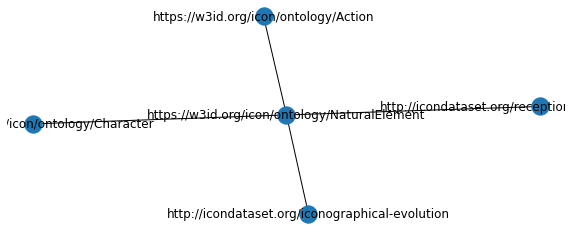

In [21]:
import matplotlib.pyplot as plt
import networkx as nx
fig, ax=plt.subplots(figsize=(10,4))
GA=nx.from_pandas_edgelist(rules,source='antecedents',target='consequents')
nx.draw(GA,with_labels=True)
plt.show()

### 2.4.1 Same analysis, taking broader categories for level 2 subjects (e.g. character types, stories, allegories)

In [27]:
cf_art_set = set()
for l in cf_art_list: 
    cf_art_set.add(l[0])
#cf_art_set

In [28]:
# we redo the query for level 2. Part 1: characters. 

# lev 2
artwork_lev2broader = []

cq11 = """
prefix d: <http://icondataset.org/> 
PREFIX icon: <https://w3id.org/icon/ontology/> 
prefix sim: <https://w3id.org/simulation/ontology/>
prefix dul: <http://www.ontologydesignpatterns.org/ont/dul/DUL.owl#>
prefix crm: <http://www.cidoc-crm.org/cidoc-crm/>

SELECT DISTINCT ?artwork ?lev2 ?typeLabel  WHERE {
  VALUES ?rel {icon:hasCharacter icon:hasEvent icon:hasNamedObject icon:hasPlace icon:hasPersonification icon:hasSymbol}
  VALUES ?artwork { """+ ' '.join(cf_art_set) +"""}
  ?icrec icon:aboutWorkOfArt ?artwork; icon:recognizedImage ?img. 
  ?img ?rel ?lev2.
  ?lev2 crm:P2_has_type ?type. 
  ?type rdfs:label ?typeLabel. 
} 
""" 

cq11res = newg.query(cq11)
for row in cq11res:
    artwork_lev2broader.append([str(row[0]), str(row[1]), str(row[2])])
    print(row)


(rdflib.term.URIRef('http://icondataset.org/ART1352'), rdflib.term.URIRef('http://icondataset.org/saint-paul'), rdflib.term.Literal('human'))
(rdflib.term.URIRef('http://icondataset.org/ART1352'), rdflib.term.URIRef('http://icondataset.org/moses'), rdflib.term.Literal('human biblical figure'))
(rdflib.term.URIRef('http://icondataset.org/ART1352'), rdflib.term.URIRef('http://icondataset.org/pope-julius-ii'), rdflib.term.Literal('human'))
(rdflib.term.URIRef('http://icondataset.org/ART1055'), rdflib.term.URIRef('http://icondataset.org/polyxena'), rdflib.term.Literal('mythological Greek character'))
(rdflib.term.URIRef('http://icondataset.org/ART1379'), rdflib.term.URIRef('http://icondataset.org/tityus'), rdflib.term.Literal('mythological Greek character'))
(rdflib.term.URIRef('http://icondataset.org/ART1160'), rdflib.term.URIRef('http://icondataset.org/mary'), rdflib.term.Literal('human biblical figure'))
(rdflib.term.URIRef('http://icondataset.org/ART1160'), rdflib.term.URIRef('http://i

(rdflib.term.URIRef('http://icondataset.org/ART1261'), rdflib.term.URIRef('http://icondataset.org/saturn'), rdflib.term.Literal('roman deity'))
(rdflib.term.URIRef('http://icondataset.org/ART1261'), rdflib.term.URIRef('http://icondataset.org/saturn'), rdflib.term.Literal('deity'))
(rdflib.term.URIRef('http://icondataset.org/ART1043'), rdflib.term.URIRef('http://icondataset.org/apollo'), rdflib.term.Literal('Greek deity'))
(rdflib.term.URIRef('http://icondataset.org/ART1043'), rdflib.term.URIRef('http://icondataset.org/the-three-graces'), rdflib.term.Literal('mythical entity'))
(rdflib.term.URIRef('http://icondataset.org/ART1043'), rdflib.term.URIRef('http://icondataset.org/the-three-graces'), rdflib.term.Literal('group of Greek mythical characters'))
(rdflib.term.URIRef('http://icondataset.org/ART1043'), rdflib.term.URIRef('http://icondataset.org/jupiter'), rdflib.term.Literal('Roman deity'))
(rdflib.term.URIRef('http://icondataset.org/ART1043'), rdflib.term.URIRef('http://icondataset.

(rdflib.term.URIRef('http://icondataset.org/ART1195'), rdflib.term.URIRef('http://icondataset.org/vulcan'), rdflib.term.Literal('Roman deity'))
(rdflib.term.URIRef('http://icondataset.org/ART1195'), rdflib.term.URIRef('http://icondataset.org/vulcan'), rdflib.term.Literal('roman deity'))
(rdflib.term.URIRef('http://icondataset.org/ART1195'), rdflib.term.URIRef('http://icondataset.org/vulcan'), rdflib.term.Literal('deity'))
(rdflib.term.URIRef('http://icondataset.org/ART1195'), rdflib.term.URIRef('http://icondataset.org/hylas'), rdflib.term.Literal('mythological Greek character'))
(rdflib.term.URIRef('http://icondataset.org/ART1316'), rdflib.term.URIRef('http://icondataset.org/cupid'), rdflib.term.Literal('roman deity'))
(rdflib.term.URIRef('http://icondataset.org/ART1316'), rdflib.term.URIRef('http://icondataset.org/cupid'), rdflib.term.Literal('deity'))
(rdflib.term.URIRef('http://icondataset.org/ART1316'), rdflib.term.URIRef('http://icondataset.org/aglauros'), rdflib.term.Literal('myt

(rdflib.term.URIRef('http://icondataset.org/ART1000'), rdflib.term.URIRef('http://icondataset.org/jupiter'), rdflib.term.Literal('Roman deity'))
(rdflib.term.URIRef('http://icondataset.org/ART1000'), rdflib.term.URIRef('http://icondataset.org/jupiter'), rdflib.term.Literal('roman deity'))
(rdflib.term.URIRef('http://icondataset.org/ART1000'), rdflib.term.URIRef('http://icondataset.org/jupiter'), rdflib.term.Literal('deity'))
(rdflib.term.URIRef('http://icondataset.org/ART1065'), rdflib.term.URIRef('http://icondataset.org/the-three-graces'), rdflib.term.Literal('mythical entity'))
(rdflib.term.URIRef('http://icondataset.org/ART1065'), rdflib.term.URIRef('http://icondataset.org/the-three-graces'), rdflib.term.Literal('group of Greek mythical characters'))
(rdflib.term.URIRef('http://icondataset.org/ART1253'), rdflib.term.URIRef('http://icondataset.org/silenus'), rdflib.term.Literal('mythological Greek character'))
(rdflib.term.URIRef('http://icondataset.org/ART1253'), rdflib.term.URIRef(

In [30]:
# we redo the query for level 2. Part 2: invenzioni. 
# NB: create again data with the new broader categories. not present in the current version. 


cq11 = """
prefix d: <http://icondataset.org/> 
PREFIX icon: <https://w3id.org/icon/ontology/> 
prefix sim: <https://w3id.org/simulation/ontology/>
prefix dul: <http://www.ontologydesignpatterns.org/ont/dul/DUL.owl#>
prefix crm: <http://www.cidoc-crm.org/cidoc-crm/>

SELECT DISTINCT ?artwork ?inv ?typeLabel  WHERE {
  VALUES ?rel {icon:hasCharacter icon:hasEvent icon:hasNamedObject icon:hasPlace icon:hasPersonification icon:hasSymbol}
  VALUES ?artwork { """+ ' '.join(cf_art_set) +"""}
  ?icrec icon:aboutWorkOfArt ?artwork; icon:recognizedInvenzione ?inv. 
  ?inv skos:broader ?type.
  ?type rdfs:label ?typeLabel. 
} 
""" 

cq11res = newg.query(cq11)
for row in cq11res:
    artwork_lev2broader.append([str(row[0]), str(row[1]), str(row[2])])
    print(row)


[Back to top](#Dataset-overview) <br>
[Back to section 2](#2.-Overwiew-of-Cultural-Phenomena)

# 3. Overview of subjects relations<a class="anchor" id="third-bullet"></a>
Visualization of level 1, 2, 3 subjects relations
<br>
[Back to top](#Dataset-overview)


In [19]:
# query the blazegraph server
tot_art_list2 = []
result = server.query("""
prefix d: <http://icondataset.org/> 
PREFIX icon: <https://w3id.org/icon/ontology/> 
prefix sim: <https://w3id.org/simulation/ontology/>
prefix dul: <http://www.ontologydesignpatterns.org/ont/dul/DUL.owl#>
prefix crm: <http://www.cidoc-crm.org/cidoc-crm/>

SELECT DISTINCT ?artwork ?subj1 ?type1 ?subj2 ?type2 ?subj3 ?type3  WHERE {
  VALUES ?rel1 {icon:hasExpressionalMeaning icon:hasFactualMeaning crm:P138_depicts}
  VALUES ?rel2 {icon:hasCharacter icon:hasEvent icon:hasNamedObject icon:hasPlace icon:hasPersonification icon:hasSymbol}
  
  ?subj3 (^icon:recognizedCulturalPhenomenon | ^icon:recognizedConceptualObject) / ^icon:recognizedIntrinsicMeaning ?iconol .
  ?subj3 a ?type3. 
  ?iconol icon:aboutWorkOfArt ?artwork .
   ?icrec icon:aboutWorkOfArt ?artwork; 
          a icon:IconographicalRecognition.
  {?icrec icon:recognizedImage ?image. ?image ?rel2 ?subj2 }
  UNION
  {?icrec icon:recognizedInvenzione ?subj2}
  ?subj2 a ?type2. 
  ?preicrec icon:aboutWorkOfArt ?artwork; 
      a icon:PreiconographicalRecognition; 
      icon:recognizedArtisticMotif | icon:recognizedComposition ?lev1.
 {?lev1 icon:hasPart ?am. ?am ?rel1 ?subj1} UNION {?lev1 ?rel1 ?subj1}
 # ?subj1 rdfs:label ?subj1Label; 
   ?subj1 a ?type1.
#  ?type1 rdfs:label ?type1Label. 
# ?subj1 rdfs:label ?subj1Label. 

} ORDER BY ?artwork
    """)


for b in result['results']['bindings']:
        tot_art_list2.append([b["artwork"]["value"], b["subj1"]["value"], b["type1"]["value"], b["subj2"]["value"], b["type2"]["value"], b["subj3"]["value"], b["type3"]["value"]])
# tot_art_list2

In [20]:
first_line = ["artwork", "subj1", "type1", "subj2", "type2", "subj3", "type3"]
store_csv("all_levels2.csv", first_line, tot_art_list2)

'all_levels2.csv'

In [82]:
# same query, too slow
tot_art_list = []
# no modify
cq2 = """
prefix d: <http://icondataset.org/> 
PREFIX icon: <https://w3id.org/icon/ontology/> 
prefix sim: <https://w3id.org/simulation/ontology/>
prefix dul: <http://www.ontologydesignpatterns.org/ont/dul/DUL.owl#>
prefix crm: <http://www.cidoc-crm.org/cidoc-crm/>

SELECT DISTINCT ?artwork ?subj1 ?type1 ?subj2 ?type2 ?subj3 ?type3  WHERE {
  VALUES ?rel1 {icon:hasExpressionalMeaning icon:hasFactualMeaning crm:P138_depicts}
  VALUES ?rel2 {icon:hasCharacter icon:hasEvent icon:hasNamedObject icon:hasPlace icon:hasPersonification icon:hasSymbol}
  
  ?subj3 (^icon:recognizedCulturalPhenomenon | ^icon:recognizedConceptualObject) / ^icon:recognizedIntrinsicMeaning ?iconol .
  ?subj3 a ?type3. 
  ?iconol icon:aboutWorkOfArt ?artwork .
  ?icrec icon:aboutWorkOfArt ?artwork; 
          a icon:IconographicalRecognition.
  {?icrec icon:recognizedImage ?image. ?image ?rel2 ?subj2 }
  UNION
  {?icrec icon:recognizedInvenzione ?subj2}
  ?subj2 a ?type2. 
  ?preicrec icon:aboutWorkOfArt ?artwork; 
      a icon:PreiconographicalRecognition; 
      icon:recognizedArtisticMotif | icon:recognizedComposition ?lev1.
 {?lev1 icon:hasPart ?am. ?am ?rel1 ?subj1} UNION {?lev1 ?rel1 ?subj1}
 # ?subj1 rdfs:label ?subj1Label; 
   ?subj1 a ?type1.
#  ?type1 rdfs:label ?type1Label. 
# ?subj1 rdfs:label ?subj1Label. 

} 
""" 

cq2res = newg.query(cq2)
for row in cq2res:
    tot_art_list.append([str(row[0]), str(row[1]), str(row[2]), str(row[3]), str(row[4]), str(row[5]), str(row[6])])
 # print(str(row[0]), str(row[1]), str(row[2]), str(row[3]), str(row[4]), str(row[5]), str(row[6]))

In [28]:
df_all1 = pd.DataFrame(np.array(tot_art_list2),
                   columns=['artwork', 'subj1', 'type1', 'subj2', 'type2', 'subj3', 'type3'])
df_all1

,artwork,subj1,type1,subj2,type2,subj3,type3
0,http://icondataset.org/ART1000,http://icondataset.org/dove,https://w3id.org/icon/ontology/NaturalElement,http://icondataset.org/jupiter,https://w3id.org/icon/ontology/Character,http://icondataset.org/CF1040,https://w3id.org/icon/ontology/CulturalPhenomenon
1,http://icondataset.org/ART1000,http://icondataset.org/dove,https://w3id.org/icon/ontology/NaturalElement,http://icondataset.org/venus,https://w3id.org/icon/ontology/Character,http://icondataset.org/CF1040,https://w3id.org/icon/ontology/CulturalPhenomenon
2,http://icondataset.org/ART1000,http://icondataset.org/eagle,https://w3id.org/icon/ontology/NaturalElement,http://icondataset.org/jupiter,https://w3id.org/icon/ontology/Character,http://icondataset.org/CF1040,https://w3id.org/icon/ontology/CulturalPhenomenon
3,http://icondataset.org/ART1000,http://icondataset.org/eagle,https://w3id.org/icon/ontology/NaturalElement,http://icondataset.org/venus,https://w3id.org/icon/ontology/Character,http://icondataset.org/CF1040,https://w3id.org/icon/ontology/CulturalPhenomenon
4,http://icondataset.org/ART1000,http://icondataset.org/man,https://w3id.org/icon/ontology/NaturalElement,http://icondataset.org/jupiter,https://w3id.org/icon/ontology/Character,http://icondataset.org/CF1040,https://w3id.org/icon/ontology/CulturalPhenomenon
...,...,...,...,...,...,...,...
41359,http://icondataset.org/ART1539,http://icondataset.org/niche,https://w3id.org/icon/ontology/NaturalElement,http://icondataset.org//pers/vita-activa,https://w3id.org/icon/ontology/Personification,http://icondataset.org/CF1097,https://w3id.org/icon/ontology/CulturalPhenomenon
41360,http://icondataset.org/ART1539,http://icondataset.org/niche,https://w3id.org/icon/ontology/NaturalElement,http://icondataset.org//pers/vita-contemplativa,https://w3id.org/icon/ontology/Personification,http://icondataset.org/CF1097,https://w3id.org/icon/ontology/CulturalPhenomenon
41361,http://icondataset.org/ART1539,http://icondataset.org/niche,https://w3id.org/icon/ontology/NaturalElement,http://icondataset.org/leach,https://w3id.org/icon/ontology/Character,http://icondataset.org/CF1097,https://w3id.org/icon/ontology/CulturalPhenomenon
41362,http://icondataset.org/ART1539,http://icondataset.org/niche,https://w3id.org/icon/ontology/NaturalElement,http://icondataset.org/pope-julius-ii,https://w3id.org/icon/ontology/Character,http://icondataset.org/CF1097,https://w3id.org/icon/ontology/CulturalPhenomenon


In [29]:
# Some subjects have 2 types (eg material NaturalElement, and Symbol, Simulation). Therefore, the results are repeated. 
# delete the rows with the second type not needed

#df_all1[(df_all1.type1 != "http://www.cidoc-crm.org/cidoc-crm/E57_Material")]
#df_all1[(df_all1.type2 != "https://w3id.org/simulation/ontology/Simulation")]


df_all1 = df_all1.drop(df_all1[df_all1.type1 == "http://www.cidoc-crm.org/cidoc-crm/E57_Material"].index)
df_all1 = df_all1.drop(df_all1[df_all1.type2 == "https://w3id.org/simulation/ontology/Simulation"].index)

In [50]:
# we start the analysis on test_2, counting artworks
# first dataframe: counting of artworks with relations from lev 1 to lev 2

df_lev1_to_lev2 = df_all1.groupby(["type1", "type2"])["artwork"].count().reset_index()
df_lev1_to_lev2.columns = ["source", "target", "value"]
#df_lev1_to_lev2

In [51]:
df_lev2_to_lev3 = df_all1.groupby(["type2", "type3"])["artwork"].count().reset_index()
df_lev2_to_lev3.columns = ["source", "target", "value"]
#df_lev2_to_lev3

In [74]:
# merge the two df
links = pd.concat([df_lev1_to_lev2, df_lev2_to_lev3], axis=0)
links

,source,target,value
0,https://w3id.org/icon/ontology/Action,http://www.cidoc-crm.org/cidoc-crm/E21_Person,149
1,https://w3id.org/icon/ontology/Action,https://w3id.org/icon/ontology/Allegory,153
2,https://w3id.org/icon/ontology/Action,https://w3id.org/icon/ontology/Character,2832
3,https://w3id.org/icon/ontology/Action,https://w3id.org/icon/ontology/Event,1274
4,https://w3id.org/icon/ontology/Action,https://w3id.org/icon/ontology/Invenzione,12
5,https://w3id.org/icon/ontology/Action,https://w3id.org/icon/ontology/NamedObject,173
6,https://w3id.org/icon/ontology/Action,https://w3id.org/icon/ontology/Personification,805
7,https://w3id.org/icon/ontology/Action,https://w3id.org/icon/ontology/Place,38
8,https://w3id.org/icon/ontology/Action,https://w3id.org/icon/ontology/Story,467
9,https://w3id.org/icon/ontology/Action,https://w3id.org/icon/ontology/Symbol,1685


In [69]:
# replace with labels
#unique_source_target_all = list(pd.unique(links[["source", "target"]].values.ravel("K")))
label_dict = {}
unique_source_target = list(pd.unique(links[["source", "target"]].values.ravel("K")))
for unique in unique_source_target: 
    if unique.startswith("https://w3id.org/icon/ontology/"): 
        name = unique.replace("https://w3id.org/icon/ontology/", "")
    elif unique.startswith("http://www.cidoc-crm.org/cidoc-crm/"): 
        name = unique.replace("http://www.cidoc-crm.org/cidoc-crm/", "")
    label_dict[unique] = name
label_dict 


{'https://w3id.org/icon/ontology/Action': 'Action',
 'https://w3id.org/icon/ontology/ExpressionalQuality': 'ExpressionalQuality',
 'https://w3id.org/icon/ontology/NaturalElement': 'NaturalElement',
 'http://www.cidoc-crm.org/cidoc-crm/E21_Person': 'E21_Person',
 'https://w3id.org/icon/ontology/Allegory': 'Allegory',
 'https://w3id.org/icon/ontology/Character': 'Character',
 'https://w3id.org/icon/ontology/Event': 'Event',
 'https://w3id.org/icon/ontology/Invenzione': 'Invenzione',
 'https://w3id.org/icon/ontology/NamedObject': 'NamedObject',
 'https://w3id.org/icon/ontology/Personification': 'Personification',
 'https://w3id.org/icon/ontology/Place': 'Place',
 'https://w3id.org/icon/ontology/Story': 'Story',
 'https://w3id.org/icon/ontology/Symbol': 'Symbol',
 'http://www.cidoc-crm.org/cidoc-crm/E28_Conceptual_Object': 'E28_Conceptual_Object',
 'https://w3id.org/icon/ontology/CulturalPhenomenon': 'CulturalPhenomenon'}

In [64]:
unique_source_target

['https://w3id.org/icon/ontology/Action',
 'https://w3id.org/icon/ontology/ExpressionalQuality',
 'https://w3id.org/icon/ontology/NaturalElement',
 'http://www.cidoc-crm.org/cidoc-crm/E21_Person',
 'https://w3id.org/icon/ontology/Allegory',
 'https://w3id.org/icon/ontology/Character',
 'https://w3id.org/icon/ontology/Event',
 'https://w3id.org/icon/ontology/Invenzione',
 'https://w3id.org/icon/ontology/NamedObject',
 'https://w3id.org/icon/ontology/Personification',
 'https://w3id.org/icon/ontology/Place',
 'https://w3id.org/icon/ontology/Story',
 'https://w3id.org/icon/ontology/Symbol',
 'http://www.cidoc-crm.org/cidoc-crm/E28_Conceptual_Object',
 'https://w3id.org/icon/ontology/CulturalPhenomenon']

In [75]:
# we replace the uris with the labels
links2=links.replace({"source": label_dict})
links3=links2.replace({"target": label_dict})
links3

,source,target,value
0,Action,E21_Person,149
1,Action,Allegory,153
2,Action,Character,2832
3,Action,Event,1274
4,Action,Invenzione,12
5,Action,NamedObject,173
6,Action,Personification,805
7,Action,Place,38
8,Action,Story,467
9,Action,Symbol,1685


In [76]:
unique_source_target_all = list(pd.unique(links3[["source", "target"]].values.ravel("K")))

In [77]:
# we extract all the unique values
# unique_source_target_all = list(pd.unique(links3[["source", "target"]].values.ravel("K")))
#unique_source_target

# we map the labels with their index in the list
mapping_dict_all = {k:v for v, k in enumerate(unique_source_target_all)}
mapping_dict_all

# we replace names with the indices
links3["source"] = links3["source"].map(mapping_dict_all)
links3["target"] = links3["target"].map(mapping_dict_all)

# we transform the dataframe in a dict
links_dict = links3.to_dict(orient ="list")

# create the diagram

# https://plotly.com/python/sankey-diagram/
# useful tutorial: https://www.youtube.com/watch?v=yyVwvBUFRwY 
#import plotly.graph_objects as go

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = unique_source_target_all,
      color = "blue"
    ),
    link = dict(
      source = links_dict["source"], # indices corresponding to labels, eg A1, A2, A1, B1, ...
      target = links_dict["target"],
      value = links_dict["value"]
  ))])
# the graph shows the n to n relations happening between elements of different levels (e.g. to one natural element may correspond several symbols and several cultural phenomena)
# the counting represent single instances hence not unique subjects (e.g. at the first level, we don't represent the concept of a dog but the sum of all the representations of a dog)
fig.update_layout(title_text="Correspondence of subjects categories in the three levels (counting: Artworks)", font_size=10)
fig.show()

In [132]:
df_all1.to_csv('art_all_levels.csv', index=False)

### Sankey diagram of the direct link between level 1 and level 2 objects in ART1197

In [13]:
# extract data 
test_1 = []
# no modify
cq2 = """
prefix d: <http://icondataset.org/> 
PREFIX icon: <https://w3id.org/icon/ontology/> 
prefix sim: <https://w3id.org/simulation/ontology/>
prefix dul: <http://www.ontologydesignpatterns.org/ont/dul/DUL.owl#>
prefix crm: <http://www.cidoc-crm.org/cidoc-crm/>

SELECT DISTINCT ?am ?subj1 ?type1 ?image ?subj2 ?type2  WHERE {
  VALUES ?rel1 {icon:hasExpressionalMeaning icon:hasFactualMeaning crm:P138_depicts}
  VALUES ?rel2 {icon:hasCharacter icon:hasEvent icon:hasNamedObject icon:hasPlace icon:hasPersonification icon:hasSymbol}
  

  ?icrec icon:aboutWorkOfArt d:ART1197; 
          a icon:IconographicalRecognition;
          icon:recognizedImage ?image. 
  ?image ?rel2 ?subj2.  
  ?subj2 a ?type2. 
 # ?type2 rdfs:label ?type2Label. 
  {?icrec icon:refersToArtisticMotif ?lev1. 
  ?lev1 icon:hasPart ?am. ?am ?rel1 ?subj1} 
  UNION 
  {?icrec icon:refersToArtisticMotif ?am. ?am ?rel1 ?subj1}
  ?subj1 a ?type1. 
 # ?type1 rdfs:label ?type1Label.


} 
""" 

cq2res = newg.query(cq2)
for row in cq2res:
    test_1.append([str(row[0]), str(row[1]), str(row[2]), str(row[3]), str(row[4]), str(row[5])])
    print(str(row[0]), str(row[1]), str(row[2]), str(row[3]), str(row[4]), str(row[5]))

http://icondataset.org/ART1197-AM18 http://icondataset.org/smiling https://w3id.org/icon/ontology/ExpressionalQuality http://icondataset.org/ART1197-IMG2 http://icondataset.org/bacchus https://w3id.org/icon/ontology/Character
http://icondataset.org/ART1197-AM12 http://icondataset.org/man https://w3id.org/icon/ontology/NaturalElement http://icondataset.org/ART1197-IMG1 http://icondataset.org/silenus https://w3id.org/icon/ontology/Character
http://icondataset.org/ART1197-AM13 http://icondataset.org/riding-a-mule https://w3id.org/icon/ontology/Action http://icondataset.org/ART1197-IMG1 http://icondataset.org/silenus https://w3id.org/icon/ontology/Character
http://icondataset.org/ART1197-AM23 http://icondataset.org/holding-with-the-other-hand https://w3id.org/icon/ontology/Action http://icondataset.org/ART1197-IMG2 http://icondataset.org/bacchus https://w3id.org/icon/ontology/Character
http://icondataset.org/ART1197-AM21 http://icondataset.org/holding-with-a-hand https://w3id.org/icon/onto

http://icondataset.org/ART1197-AM63 http://icondataset.org/sky https://w3id.org/icon/ontology/NaturalElement http://icondataset.org/ART1197-IMG5 http://icondataset.org/peaceful-landscape-on-the-left-innocent-happiness-of-a-pastoral-civilization https://w3id.org/icon/ontology/Symbol
http://icondataset.org/ART1197-AM61 http://icondataset.org/lawn https://w3id.org/icon/ontology/NaturalElement http://icondataset.org/ART1197-IMG5 http://icondataset.org/peaceful-landscape-on-the-left-innocent-happiness-of-a-pastoral-civilization https://w3id.org/icon/ontology/Symbol
http://icondataset.org/ART1197-AM60 http://icondataset.org/building https://w3id.org/icon/ontology/NaturalElement http://icondataset.org/ART1197-IMG5 http://icondataset.org/peaceful-landscape-on-the-left-innocent-happiness-of-a-pastoral-civilization https://w3id.org/icon/ontology/Symbol
http://icondataset.org/ART1197-AM62 http://icondataset.org/tree https://w3id.org/icon/ontology/NaturalElement http://icondataset.org/ART1197-IMG5

In [14]:
df_test1 = pd.DataFrame(np.array(test_1),
                   columns=['am', 'subj1', 'type1', 'image', 'subj2', 'type2'])

df_test1

,am,subj1,type1,image,subj2,type2
0,http://icondataset.org/ART1197-AM18,http://icondataset.org/smiling,https://w3id.org/icon/ontology/ExpressionalQua...,http://icondataset.org/ART1197-IMG2,http://icondataset.org/bacchus,https://w3id.org/icon/ontology/Character
1,http://icondataset.org/ART1197-AM12,http://icondataset.org/man,https://w3id.org/icon/ontology/NaturalElement,http://icondataset.org/ART1197-IMG1,http://icondataset.org/silenus,https://w3id.org/icon/ontology/Character
2,http://icondataset.org/ART1197-AM13,http://icondataset.org/riding-a-mule,https://w3id.org/icon/ontology/Action,http://icondataset.org/ART1197-IMG1,http://icondataset.org/silenus,https://w3id.org/icon/ontology/Character
3,http://icondataset.org/ART1197-AM23,http://icondataset.org/holding-with-the-other-...,https://w3id.org/icon/ontology/Action,http://icondataset.org/ART1197-IMG2,http://icondataset.org/bacchus,https://w3id.org/icon/ontology/Character
4,http://icondataset.org/ART1197-AM21,http://icondataset.org/holding-with-a-hand,https://w3id.org/icon/ontology/Action,http://icondataset.org/ART1197-IMG2,http://icondataset.org/bacchus,https://w3id.org/icon/ontology/Character
5,http://icondataset.org/ART1197-AM20,http://icondataset.org/tree-trunk-with-a-twist...,https://w3id.org/icon/ontology/NaturalElement,http://icondataset.org/ART1197-IMG2,http://icondataset.org/bacchus,https://w3id.org/icon/ontology/Character
6,http://icondataset.org/ART1197-AM17,http://icondataset.org/man,https://w3id.org/icon/ontology/NaturalElement,http://icondataset.org/ART1197-IMG2,http://icondataset.org/bacchus,https://w3id.org/icon/ontology/Character
7,http://icondataset.org/ART1197-AM19,http://icondataset.org/cup,https://w3id.org/icon/ontology/NaturalElement,http://icondataset.org/ART1197-IMG2,http://icondataset.org/bacchus,https://w3id.org/icon/ontology/Character
8,http://icondataset.org/ART1197-AM41,http://icondataset.org/human-figure-with-anima...,https://w3id.org/icon/ontology/NaturalElement,http://icondataset.org/ART1197-IMG13,http://icondataset.org/satyr,https://w3id.org/icon/ontology/Character
9,http://icondataset.org/ART1197-AM27,http://icondataset.org/wine-jug,https://w3id.org/icon/ontology/NaturalElement,http://icondataset.org/ART1197-IMG3,http://icondataset.org/ariadne,https://w3id.org/icon/ontology/Character


In [15]:
df_lev1 = df_test1.groupby(["type1", "type2"])["am"].count().reset_index()
df_lev1.columns = ["source", "target", "value"]
df_lev1

,source,target,value
0,https://w3id.org/icon/ontology/Action,https://w3id.org/icon/ontology/Character,4
1,https://w3id.org/icon/ontology/ExpressionalQua...,https://w3id.org/icon/ontology/Character,1
2,https://w3id.org/icon/ontology/NaturalElement,https://w3id.org/icon/ontology/Character,13
3,https://w3id.org/icon/ontology/NaturalElement,https://w3id.org/icon/ontology/Symbol,9
4,https://w3id.org/icon/ontology/NaturalElement,https://w3id.org/simulation/ontology/Simulation,9


In [16]:
# we extract all the unique values
unique_source_target = list(pd.unique(df_lev1[["source", "target"]].values.ravel("K")))
unique_source_target

['https://w3id.org/icon/ontology/Action',
 'https://w3id.org/icon/ontology/ExpressionalQuality',
 'https://w3id.org/icon/ontology/NaturalElement',
 'https://w3id.org/icon/ontology/Character',
 'https://w3id.org/icon/ontology/Symbol',
 'https://w3id.org/simulation/ontology/Simulation']

In [17]:
# we map the labels with their index in the list
mapping_dict = {k:v for v, k in enumerate(unique_source_target)}
mapping_dict

{'https://w3id.org/icon/ontology/Action': 0,
 'https://w3id.org/icon/ontology/ExpressionalQuality': 1,
 'https://w3id.org/icon/ontology/NaturalElement': 2,
 'https://w3id.org/icon/ontology/Character': 3,
 'https://w3id.org/icon/ontology/Symbol': 4,
 'https://w3id.org/simulation/ontology/Simulation': 5}

In [18]:
# we replace names with the indices
df_lev1["source"] = df_lev1["source"].map(mapping_dict)
df_lev1["target"] = df_lev1["target"].map(mapping_dict)

In [19]:
# we transform the dataframe in a dict
lev1_dict = df_lev1.to_dict(orient ="list")

In [20]:
# create the diagram

# https://plotly.com/python/sankey-diagram/
# useful tutorial: https://www.youtube.com/watch?v=yyVwvBUFRwY 
#import plotly.graph_objects as go

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = unique_source_target,
      color = "blue"
    ),
    link = dict(
      source = lev1_dict["source"], # indices corresponding to labels, eg A1, A2, A1, B1, ...
      target = lev1_dict["target"],
      value = lev1_dict["value"]
  ))])

fig.update_layout(title_text="Correspondence of level 1 subjects with level 2 ones in ART1197 (counting: Artistic Motifs)", font_size=10)
fig.show()

[Back to top](#Dataset-overview) <br>
[Back to section 3](#3.-Overview-of-subjects-relations)